# Draw Decision Boundary

From: https://github.com/ksatola

## Description
Use a Naive Bayes Classifier to classify (create decision boundary) between points representing car sensors readings about the road condisions (features: grade, bumpiness) to decide if the should slow down or acelerate.

## Origin
This is Python 3 version of a mini-project from [Udacity's Intro to Machine Learning](https://classroom.udacity.com/courses/ud120) free course.

## Steps to Prepare
none

## Additional Information
none

In [1]:
import sys
from time import time
from prep_terrain_data import makeTerrainData
import numpy as np
import pylab as pl

In [2]:
### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [3]:
### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
# Measure time
t0 = time()

# Fit the model
clf = GaussianNB()
clf.fit(features_train, labels_train)

print("Training time: {} seconds.".format(round(time()-t0, 3)))

Training time: 0.004 seconds.


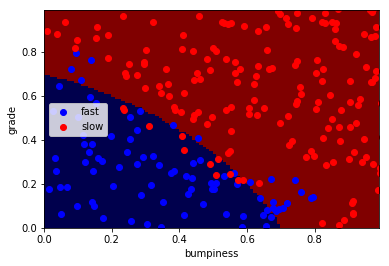

In [6]:
### draw the decision boundary with the text points overlaid
from class_vis import prettyPicture
prettyPicture(clf, features_test, labels_test, '02_NaiveBayes2.png')

In [7]:
# Measure time
t0 = time()

# Predict
pred = clf.predict(features_test)

print("Training time: {} seconds.".format(round(time()-t0, 3)))

Training time: 0.001 seconds.


In [8]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, labels_test)
accuracy

0.884

In [9]:
# Save the Model for later use

model_filename = '02_NaiveBayes2.model'

# Save the model to disk (serialize model on disk)
import pickle
pickle.dump(clf, open(model_filename, 'wb'))

In [10]:
# Load the model from disk (and perform predictions on a model without train data)
model = pickle.load(open(model_filename, 'rb'))
result = model.score(features_test, labels_test)
result

0.884